In [103]:
import pandas as pd
import seaborn as sns 
import sklearn 
import matplotlib.pyplot as plt 
#import requests 
#from tabulate import tabulate
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")


df = pd.read_csv("C:/Users/foste/Downloads/Mall_Customers.csv")




# Univariate Analysis

In [104]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [105]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


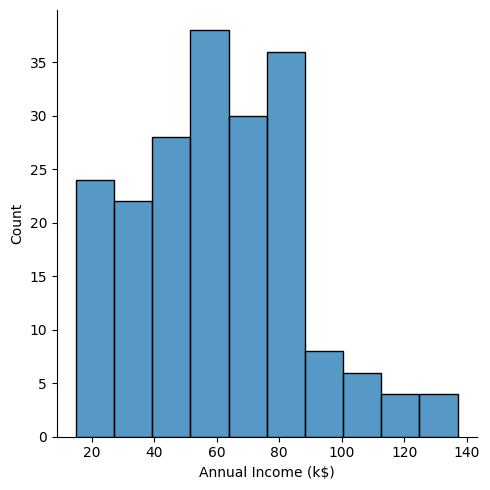

In [106]:
sns.displot(df['Annual Income (k$)'])

In [107]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

<Figure size 640x480 with 0 Axes>

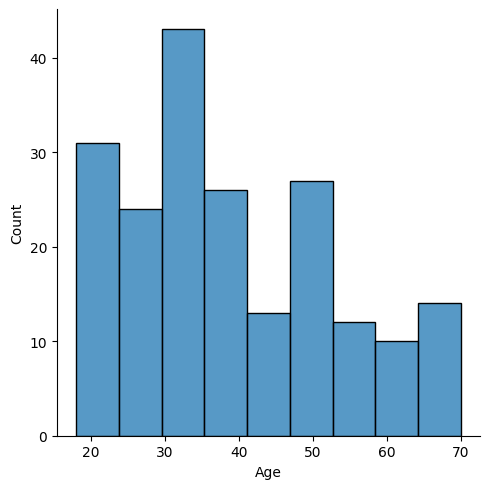

<Figure size 640x480 with 0 Axes>

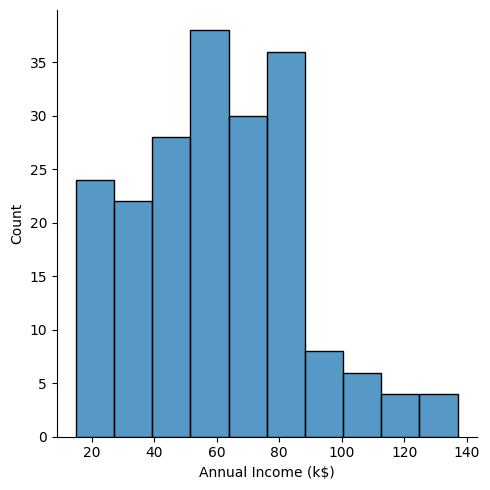

<Figure size 640x480 with 0 Axes>

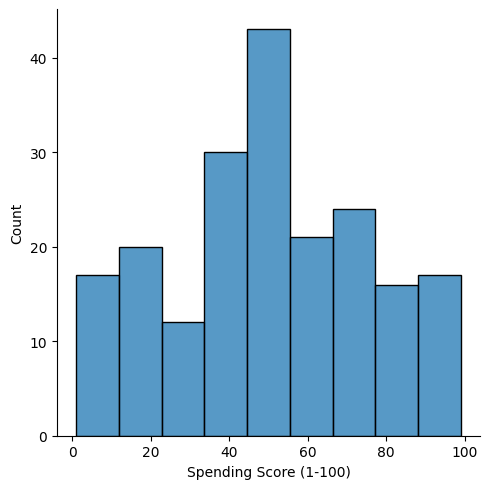

In [108]:
columns= ['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.displot(df[i])
    

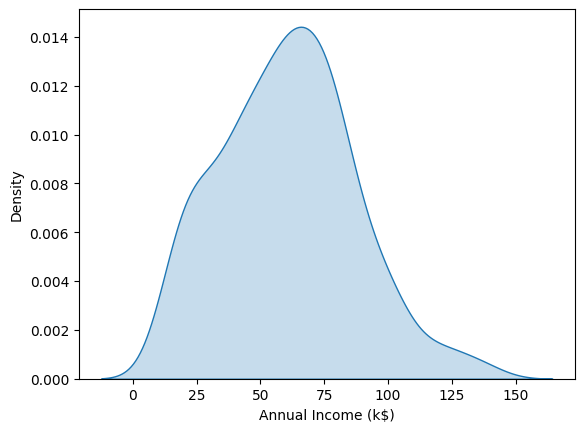

In [109]:
sns.kdeplot(df['Annual Income (k$)'], fill=True);

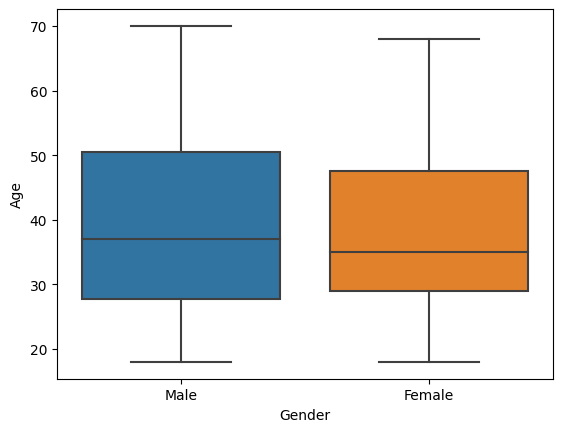

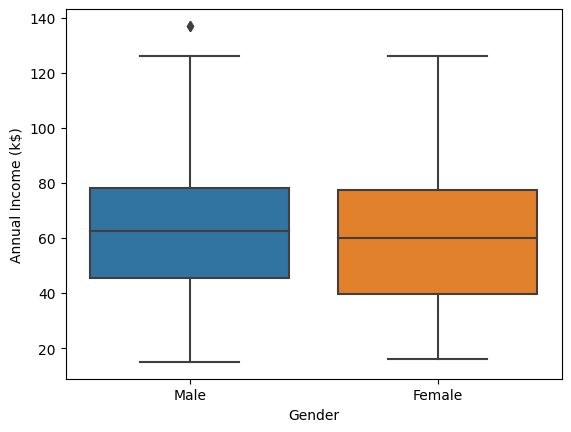

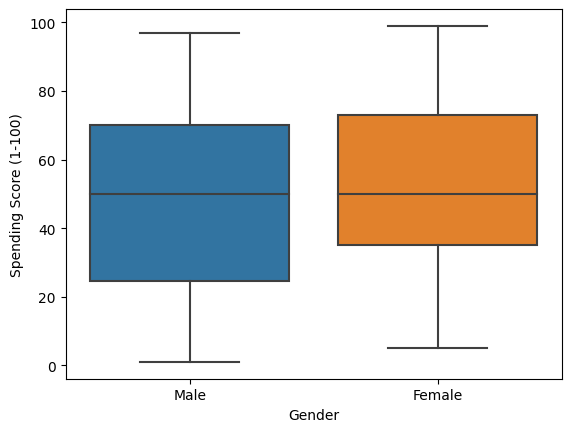

In [110]:
columns = ['Age','Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.boxplot(data=df,x='Gender',y=df[i]);
    

In [111]:
df['Gender'].value_counts(normalize=True)


Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

# Bivariate Analysis 


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

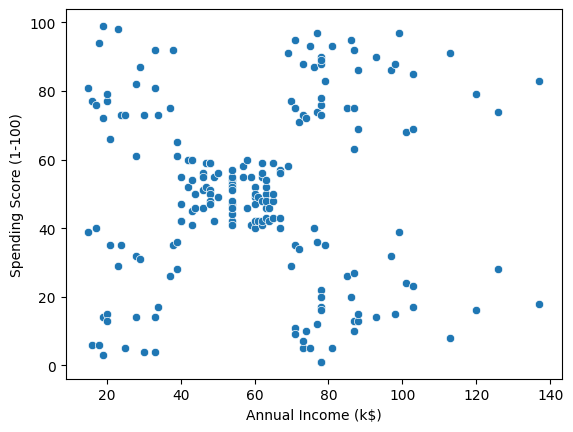

In [112]:
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)')

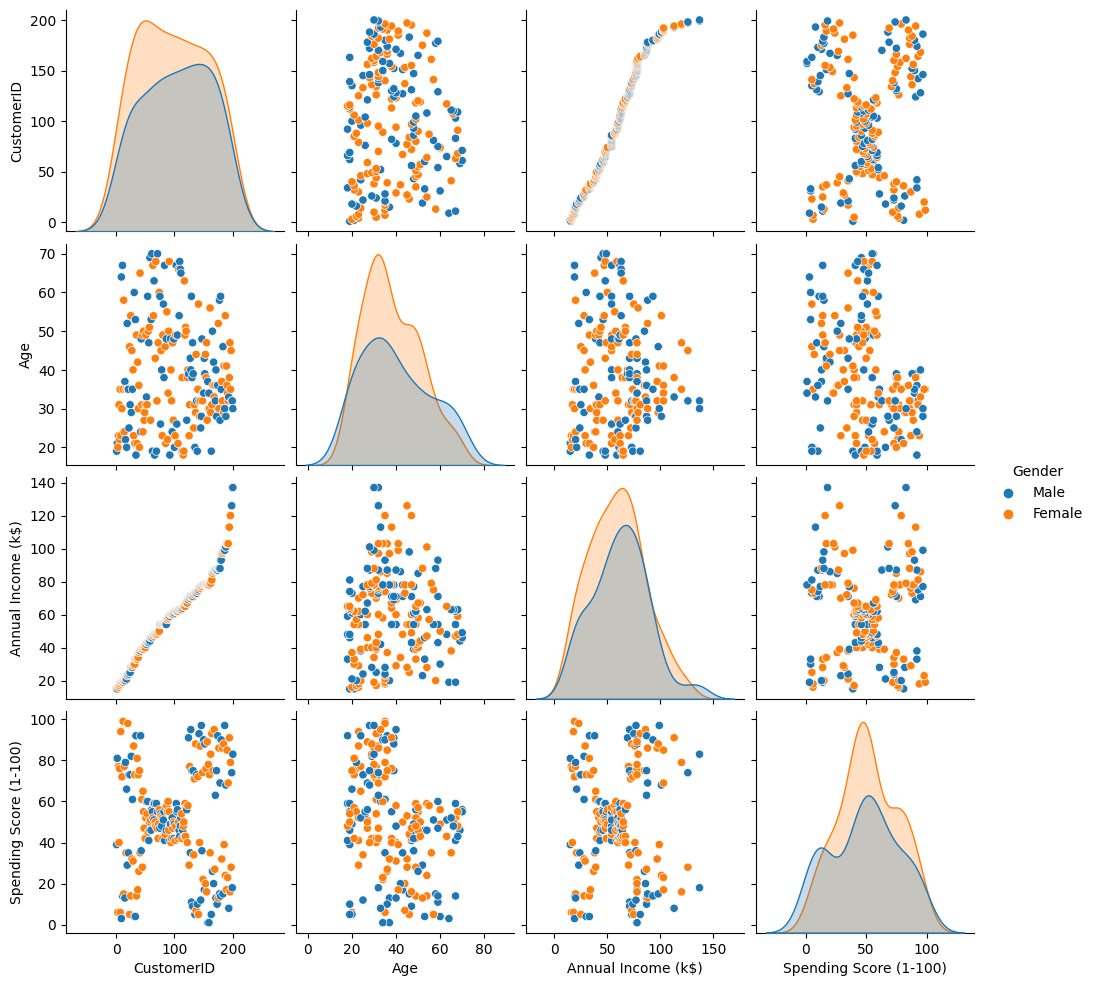

In [113]:
#df= df.drop('CustomerID',axis=1)
sns.pairplot(df,hue='Gender')

In [114]:
df.groupby(['Gender'])[['Age','Annual Income (k$)','Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


df.corr()

In [115]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

ValueError: could not convert string to float: 'Male'

# Clustering --- univariate, Bivariate and Multivariate




In [ ]:
clustering1 = KMeans(n_clusters=3)  

In [ ]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=6)

In [ ]:
clustering1.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 5, 5, 5, 5, 5,
       5, 5])

In [ ]:
df['Income Cluster'] = clustering1.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0


In [ ]:
df['Income Cluster'].value_counts()

Income Cluster
5    42
4    36
0    32
2    28
7    26
1    16
6    14
3     6
Name: count, dtype: int64

In [ ]:
clustering1.inertia_

5050.904761904762

In [ ]:
intertia_scores=[]
for i in range(1,11):
    Kmeans=KMeans(n_clusters=i)
    Kmeans.fit(df[['Annual Income (k$)']])
    intertia_scores.append(Kmeans.inertia_)

In [ ]:
intertia_scores

[137277.27999999997,
 48660.88888888889,
 23517.330930930933,
 13278.112713472485,
 8481.496190476191,
 5050.904761904762,
 3984.907059314954,
 2822.4996947496948,
 2168.4787157287155,
 1782.5832112332114]

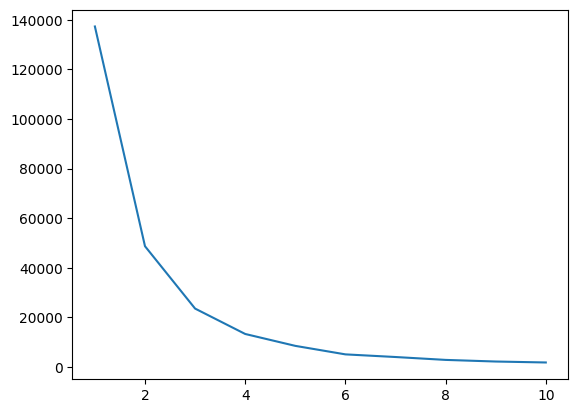

In [ ]:
plt.plot(range(1,11),intertia_scores)

In [ ]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [ ]:
df.groupby(['Income Cluster'])[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

KeyError: 'Income Cluster'

Bivariate clustering

In [ ]:
clustering2 = KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
df['Spending and Income Cluster'] = clustering2.labels_
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Spending and Income Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,1
2,3,Female,20,16,6,4
3,4,Female,23,16,77,1
4,5,Female,31,17,40,4


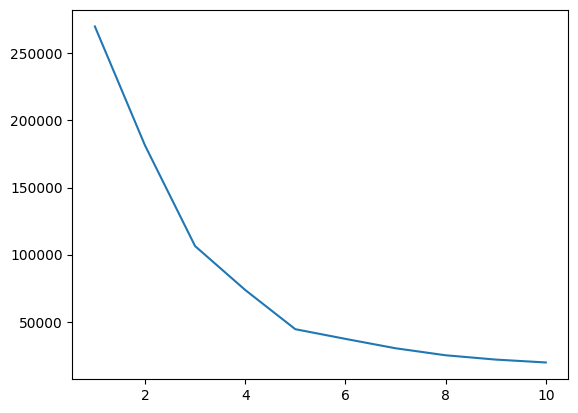

In [ ]:
intertia_scores2=[]
for i in range(1,11):
    Kmeans2=KMeans(n_clusters=i)
    Kmeans2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    intertia_scores2.append(Kmeans2.inertia_)
plt.plot(range(1,11),intertia_scores2)

In [ ]:
centers =pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['X','Y']

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

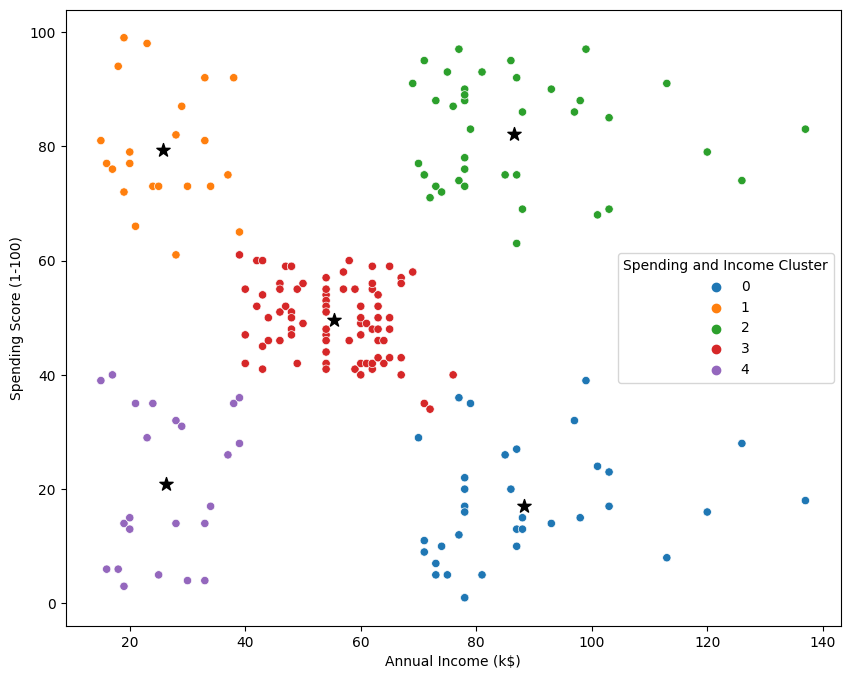

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['X'],y=centers['Y'],s=100,c='black',marker='*')
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Spending and Income Cluster',palette='tab10' )

In [ ]:
pd.crosstab(df['Spending and Income Cluster'],df['Gender'],normalize='index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.457143,0.542857
1,0.590909,0.409091
2,0.538462,0.461538
3,0.592593,0.407407
4,0.608696,0.391304


In [ ]:
df.groupby('Spending and Income Cluster')[['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,41.114286,88.200000,17.114286
1,25.272727,25.727273,79.363636
2,32.692308,86.538462,82.128205
3,42.716049,55.296296,49.518519
4,45.217391,26.304348,20.913043


# Multivariate clustering


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Spending and Income Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,1
2,3,Female,20,16,6,4
3,4,Female,23,16,77,1
4,5,Female,31,17,40,4


In [ ]:
dff = pd.get_dummies(df,drop_first=True)
dff.head()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Spending and Income Cluster,Gender_Male
0,1,19,15,39,4,True
1,2,21,15,81,1,True
2,3,20,16,6,4,False
3,4,23,16,77,1,False
4,5,31,17,40,4,False


In [ ]:


dff.columns



Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Spending and Income Cluster', 'Gender_Male'],
      dtype='object')

In [ ]:
dff = dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)','Gender_Male']]
dff.head()


,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,True
1,21,15,81,True
2,20,16,6,False
3,23,16,77,False
4,31,17,40,False


In [117]:


dff = scale.fit_transform(dff)



NameError: name 'scale' is not defined